In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Problema: Classificar diferentes tipos de Flores de Íris

* É possível catalogar as variadades da planta de acordo com certos atributos que a descrevem;

* Para isso, vamos utilizar inteligência artificial para automatizar o processo!

![texto do link](Flores_de_Íris.png)


## carregar os dados a partir de um CSV

In [6]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [7]:
# Visualizar os dados
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
dataset['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [13]:
# Iterar entre as colunas para exibir informações do cabeçalho-cinco primeiras linhas
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
for name in names:
    print(dataset[name].tail())

145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal-length, dtype: float64
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal-width, dtype: float64
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal-length, dtype: float64
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal-width, dtype: float64
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, dtype: object


In [14]:
# Iterar entre as colunas para exibir informações da cauda-cinco últimas linhas
for name in names:
    print(dataset[name].tail())

145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal-length, dtype: float64
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal-width, dtype: float64
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal-length, dtype: float64
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal-width, dtype: float64
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, dtype: object


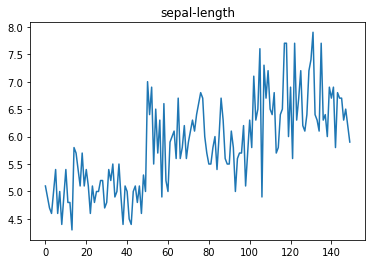

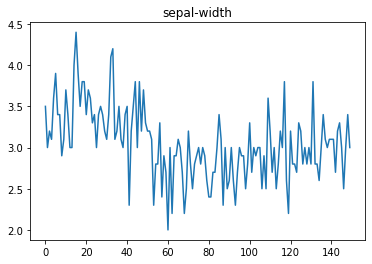

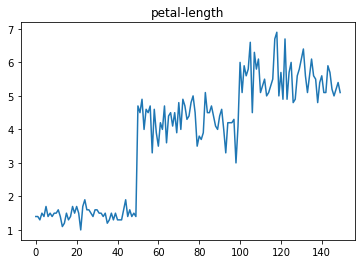

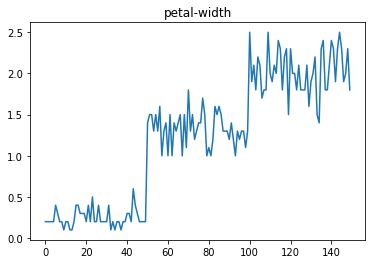

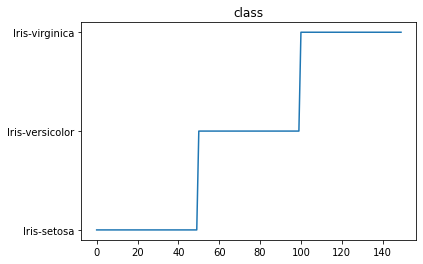

In [15]:
# Iterar entre as colunas para plotar cada uma delas
for name in names:
    #Plota o gráfico
    plt.plot(dataset[name])
    #Add um título
    plt.title(name)
    #Mostra a plotagem
    plt.show()

In [ ]:
# Descreve os atributos estatísticos do dataset
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Mostra quantas amostras existem de cada classe
print(dataset.groupby('class').size())

class
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


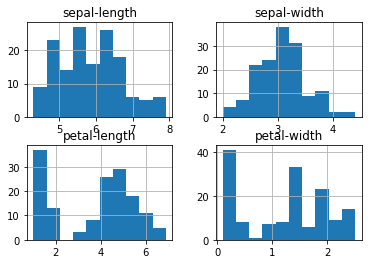

In [16]:
# Visualizar a distribuição dos Dados
dataset.hist()
plt.show()

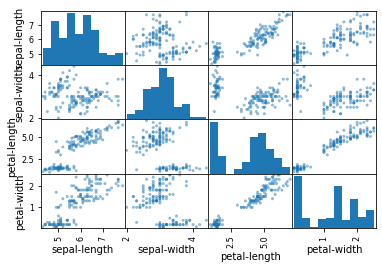

In [17]:
# Mostra a correlação entre os features (características)
scatter_matrix(dataset)
plt.show()

In [21]:
# Dividindo os dados em conjunto de treino e teste

# Transforma o dataset em um array
array = dataset.values

# O X são os features, ou seja, os atributos que definem cada classe
X = array[:,0:4]
# O y é a saída, ou seja, a classe correspondente a uma dada combinação de features
y = array[:,4]

## Dividir em treino e teste

* Temos de dividir os dados em dois conjuntos: treino e teste;

* Os dados de treino são usados para ensinar a rede neural. Ou seja, são os exemplos que levam ao aprendizado;

* Os dados de teste são como uma prova, que permite inferir se o algoritmo realmente aprendeu ou se está decorando;

* Os dados de teste nunca devem ser apresentados durante o treino!!

In [22]:
#Já existe uma função que faz o trabalho para a gente. Vamos deixar 20% para o teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                               test_size=0.20, random_state=1)

## Treinando sua primeira Rede Neural

* Existem diversos algoritmos de classificação;

* Vamos escolher alguns deles para realizar o treino e ver quem se sai melhor;

* Para isso vamos criar uma lista chamada models e adicionar cada um dos escolhidos;

* Também vamos criar uma lista para salvar os resultados!

In [23]:
# Escolhe os algoritmos de classificação e salva na lista
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Árvore de Decisão', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []

In [24]:
#Vamos iterar sobre os modelos, treinar cada rede e salvar os resultados
for name, model in models:
    # fit é treinar
    model.fit(X_train, Y_train)
    #Depois de treinado posso fazer a predição
    y_prediction = model.predict(X_train)
    #Com a predição posso comparar com o original e ver a acurácia - porcentagem de acertos
    resultado = accuracy_score(Y_train, y_prediction)
    # Posso salvar os resultados em outra lista
    results.append(resultado)
    names.append(name)
    #Imprime os resultados
    print(name, resultado)

LDA 0.9833333333333333
KNN 0.9583333333333334
Árvore de Decisão 1.0
SVM 0.975


In [25]:
for name, model in models:

    #Depois de treinado posso fazer a predição
    y_prediction = model.predict(X_test)
    #Com a predição posso comparar com o original e ver a acurácia - porcentagem de acertos
    resultado = accuracy_score(Y_test, y_prediction)
    # Posso salvar os resultados em outra lista
    results.append(resultado)
    names.append(name)
    #Imprime os resultados
    print(name, resultado)

LDA 1.0
KNN 1.0
Árvore de Decisão 0.9666666666666667
SVM 0.9666666666666667
